(100, 150)


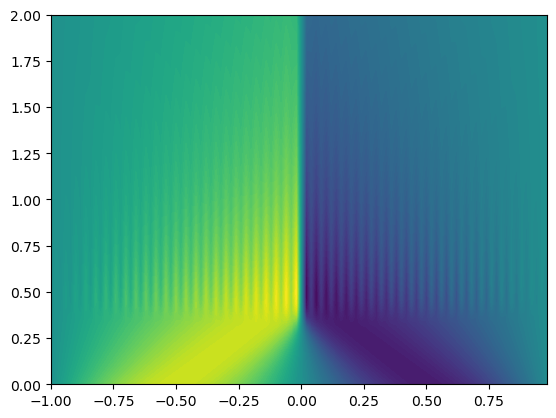

In [1]:
from scipy.fft import fft, ifft, fftshift, fftfreq
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def init_KS(x,t=0):
    u = (1+np.sin(x/10))
    return u

N = 100
L = 2
x = np.linspace(-L/2, L/2, N, endpoint=False)
x_kura = np.linspace(0,32*np.pi,N,endpoint=False)
#Omega = 2*np.pi/L*np.linspace(-N/2, N/2, N, endpoint=False)
#Omega = fftshift(Omega)
n = fftfreq(N)*N
scale = 2*np.pi/L
scale_kura = 2/32
Omega = n*scale
Omega_kura = n*scale_kura
#u0 = init_KS(x_kura)
u0 = -np.sin(np.pi*x)

def Fourier_n(u, Omega,n):
    u_hat = (1j*Omega)**n*fft(u)
    u_hat = ifft(u_hat)
    return u_hat

def Kuramoto(u, Omega):
    dudt = -u*Fourier_n(u, Omega, 1)-Fourier_n(u, Omega, 2)-Fourier_n(u, Omega, 4)
    #dudt = -0.5*Fourier_n(u*u, Omega, 1)+Fourier_n(u, Omega, 2)-Fourier_n(u, Omega, 4)
    return np.real(dudt)

def burgers(u, Omega,nu):
    #dudt = -u*Fourier_n(u, Omega, 1)+nu*Fourier_n(u, Omega, 2)
    dudt = -0.5*Fourier_n(u*u, Omega, 1)+nu*Fourier_n(u, Omega, 2)
    return np.real(dudt)

tend = 2
tspan = [0, tend]
nu = 0.01/np.pi
tmeasurements = np.linspace(0, tend, 150)
#print(tmeasurements.shape)
sol = solve_ivp(lambda t, u: burgers(u, Omega,nu),tspan, u0, t_eval=tmeasurements)

print(sol.y.shape)
plt.figure()
plt.contourf(x,sol.t,sol.y.T, 100, cmap="viridis")
#plt.imshow(sol.y, aspect='auto')
#plt.imshow(x_kura, sol.y.T,origin = 'lower')
plt.show()

# du = np.real(Fourier_n(sol.y.T, Omega, 1))
# #plt.imshow(np.real(du),origin = 'lower')
# t_find = 1.6037/np.pi
# #t_index = np.where(sol.t>=t_find)[0][0]
# #print(du[t_index,N//2])
# print(sol.t.shape)


In [2]:
print(init_KS(0))
print(init_KS(30*np.pi))

1.0
1.0000000000000004


KeyboardInterrupt: 

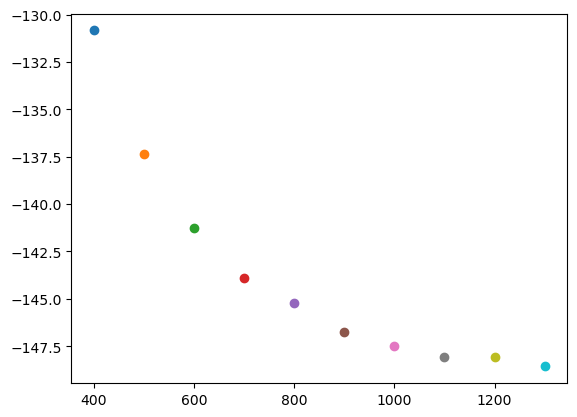

In [3]:
fig, ax = plt.subplots()
true_test_val = -152.00516
#N_tests = 596+np.logspace(1, 3, 5)
n = 20
N_tests = np.zeros(n)
N_tests[0] = 400
for i in range(n-1):
    N_tests[i+1] = N_tests[i]+100
t_find = 1.6037/np.pi
tend = 1
tspan = [0, tend]
nu = 0.01/np.pi
for N in N_tests:
    N = int(N)
    tmeasurements = np.linspace(0, tend, N)
    x = np.linspace(-L/2, L/2, N)
    Omega = 2*np.pi/L*np.linspace(-N/2, N/2, N)
    Omega = fftshift(Omega)
    u0 = -np.sin(np.pi*x)
    tmeasurements = np.linspace(0, tend, N)
    sol = solve_ivp(lambda t, u: burgers(u, Omega,nu), tspan, u0, t_eval = tmeasurements)
    du = np.real(Fourier_n(sol.y.T, Omega, 1))
    t_index = np.where(sol.t>=t_find)[0][0]
    #print(sol.t.shape)
    test_val = du[t_index,N//2]
    ax.plot(N, test_val, 'o')
ax.axhline(true_test_val, color = 'black', label = 'True value')

In [68]:
print(test_val)

-150.11263064727333
